In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tqdm import tqdm

import mindscope_utilities

from multiprocessing import Pool

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## load cached data

In [4]:
data_dir =  "/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/neuromatch_data"

experiment_table = pd.read_parquet(os.path.join(data_dir, 'inhibitory_familiar_novel_experiment_table.parquet'))
neural_data = pd.read_parquet(os.path.join(data_dir, 'inhibitory_familiar_novel_neural_data.parquet'))
stimulus_data = pd.read_parquet(os.path.join(data_dir, 'inhibitory_familiar_novel_stimulus_data.parquet'))

## View Cached Data

In [5]:
experiment_table.sample(10)

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,file_id,image_set
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,,,
948689207,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,453991,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,221.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,7,948042811,948225040,1022731544,VisualBehaviorMultiscope,225,VISl,2019-09-17 10:27:20.130375,OPHYS_4_images_B,1085401675,novel
882551943,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,435431,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,202.0,Vip-IRES-Cre,GCaMP6f,3.0,0,44.0,2,882060185,882256127,1018028383,VisualBehaviorMultiscope,219,VISl,2019-06-06 09:29:08.939495,OPHYS_3_images_A,1085673764,familiar
1050762969,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523922,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,183.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,7,1050597678,1050620316,1046576772,VisualBehaviorMultiscope,87,VISp,2020-09-15 08:52:00.527831,OPHYS_4_images_B,1085394248,novel
848760983,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,438912,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,128.0,Vip-IRES-Cre,GCaMP6f,3.0,0,22.0,2,848401585,848575992,1018027865,VisualBehaviorMultiscope,225,VISl,2019-04-09 11:42:50.000000,OPHYS_3_images_A,1085398554,familiar
1050762974,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523922,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,183.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,7,1050597678,1050620316,1046576791,VisualBehaviorMultiscope,217,VISl,2020-09-15 08:52:00.527831,OPHYS_4_images_B,1085394237,novel
1050762975,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523922,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,183.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,7,1050597678,1050620316,1046576784,VisualBehaviorMultiscope,69,VISl,2020-09-15 08:52:00.527831,OPHYS_4_images_B,1085394054,novel
957759564,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085398496,novel
853363743,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,440631,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,127.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,852794141,852974537,1018028138,VisualBehaviorMultiscope,175,VISp,2019-04-17 08:54:40.065688,OPHYS_4_images_B,1085397371,novel
978296110,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,482853,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,130.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,978201478,978216799,1018028218,VisualBehaviorMultiscope,287,VISl,2019-11-07 14:08:52.318328,OPHYS_4_images_B,1085398086,novel


In [6]:
neural_data

cell_specimen_id       dff    events  filtered_events  \
cell_roi_id timestamps                                                          
1080723131  8.70512           1086618338  0.538217  0.000000         0.000000   
            8.79832           1086618338  0.196982  0.000000         0.000000   
            8.89152           1086618338  0.229645  0.000000         0.000000   
            8.98473           1086618338  0.599996  0.000000         0.000000   
            9.07793           1086618338  0.217179  0.000000         0.000000   
...                                  ...       ...       ...              ...   
1080852997  4509.54717        1086551114  5.430897  3.294402         1.555398   
            4509.64043        1086551114  6.098658  0.000000         1.213015   
            4509.73369        1086551114  5.567645  0.000000         0.767153   
            4509.82695        1086551114  4.150718  0.000000         0.389025   
            4509.92021        1086551114  2.230948  0.000000         0.156708   

                        ophys_experiment_id  ophys_session_id  
cell_roi_id timestamps                                         
1080723131  8.70512               958527481         954954402  
            8.79832               958527481         954954402  
            8.89152               958527481         954954402  
            8.98473               958527481         954954402  
            9.07793               958527481         954954402  
...                                     ...               ...  
1080852997  4509.54717            853363739         852794141  
            4509.64043            853363739         852794141  
            4509.73369            853363739         852794141  
            4509.82695            853363739         852794141  
            4509.92021            853363739         852794141  

[78844506 rows x 6 columns]

In [7]:
stimulus_data

,stimulus_presentations_id,duration,end_frame,image_index,image_name,image_set,index,omitted,start_frame,start_time,stop_time,is_change
ophys_session_id,,,,,,,,,,,,
954954402,0,0.25018,18001.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,0,False,17986,308.68699,308.93717,False
954954402,1,0.25020,18046.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,1,False,18031,309.43761,309.68781,False
954954402,2,0.25023,18091.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,2,False,18076,310.18819,310.43842,False
954954402,3,0.25020,18136.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,3,False,18121,310.93881,311.18901,False
954954402,4,0.25020,18181.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,4,False,18166,311.68944,311.93964,False
...,...,...,...,...,...,...,...,...,...,...,...,...
852794141,4791,0.25020,233623.0,1,im106,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4605,False,233608,3906.00812,3906.25832,False
852794141,4792,0.25021,233668.0,1,im106,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4606,False,233653,3906.75873,3907.00894,False
852794141,4793,0.25020,233713.0,1,im106,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4607,False,233698,3907.50935,3907.75955,False


## make a cell table, which will map every cell to a correspoding experiment/session
This will give us one row per unique cell

In [8]:
cell_table = (
    neural_data.reset_index()
    .drop(columns=['timestamps','dff', 'events','filtered_events'])
    .drop_duplicates()
    .set_index('cell_roi_id')
)
cell_table

,cell_specimen_id,ophys_experiment_id,ophys_session_id
cell_roi_id,,,
1080723131,1086618338,958527481,954954402
1080723170,1086617208,958527481,954954402
1080723184,1086617474,958527481,954954402
1080723229,1086619247,958527481,954954402
1080723244,1086621003,958527481,954954402
...,...,...,...
1080852960,1086551052,853363739,852794141
1080852965,1086550620,853363739,852794141
1080852970,1086551301,853363739,852794141


In [15]:
cell_roi_ids = neural_data.index.unique(level=0)

In [16]:
cell_specimen_ids = neural_data['cell_specimen_id'].unique()

In [52]:
cell_table_2 = []
for cell_roi_id in tqdm(cell_roi_ids):
    cell_dict = neural_data.loc[cell_roi_id].iloc[0].drop(['dff', 'events', 'filtered_events']).to_dict()
    cell_dict.update({'cell_roi_id': int(cell_roi_id)})
    cell_table_2.append(cell_dict)

100%|██████████| 1652/1652 [02:24<00:00, 11.46it/s]


In [54]:
cell_table_2 = pd.DataFrame(cell_table_2)


In [55]:
cell_table_2

,cell_specimen_id,ophys_experiment_id,ophys_session_id,cell_roi_id
0,1.086618e+09,958527481.0,954954402.0,1080723131
1,1.086617e+09,958527481.0,954954402.0,1080723170
2,1.086617e+09,958527481.0,954954402.0,1080723184
3,1.086619e+09,958527481.0,954954402.0,1080723229
4,1.086621e+09,958527481.0,954954402.0,1080723244
...,...,...,...,...
1647,1.086551e+09,853363739.0,852794141.0,1080852960
1648,1.086551e+09,853363739.0,852794141.0,1080852965
1649,1.086551e+09,853363739.0,852794141.0,1080852970
1650,1.086551e+09,853363739.0,852794141.0,1080852987


## Examine Cached Data

In [8]:
print('image set types: {}'.format(experiment_table['image_set'].unique()))

image set types: ['familiar' 'novel']


In [9]:
print('stimulus presentations can be changes: {}'.format(stimulus_data['is_change'].unique()))

stimulus presentations can be changes: [False  True]


In [10]:
print('cre lines (cell types) included in this dataset are: {}'.format(experiment_table['cre_line'].unique()))

cre lines (cell types) included in this dataset are: ['Sst-IRES-Cre' 'Vip-IRES-Cre']


In [11]:
print('there are {} mice in this dataset'.format(len(experiment_table['mouse_id'].unique()),))

there are 12 mice in this dataset


In [12]:
print('there are {} neurons in this dataset'.format(len(cell_table)))

there are 1652 neurons in this dataset


## We can look at the full response for one cell

<AxesSubplot:xlabel='timestamps'>

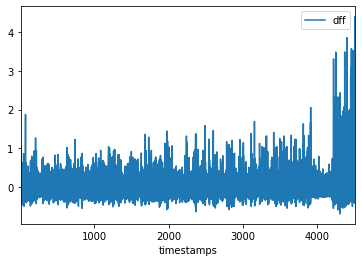

In [13]:
cell_roi_id = 1080723131
neural_data.loc[cell_roi_id].plot(
    y = 'dff'
)

## We can calculate the response of a cell to a given set of events using the `event_triggered_response` function in `mindscope_utilities`.

In [14]:
%%time
# define cell to plot
cell_roi_id = 1080722726

# get the corresponding session ID
ophys_session_id = cell_table.loc[cell_roi_id]['ophys_session_id']

# get the omission triggered response by slicing relative to the omission start_times (times when omitted stimuli would have been shown)
omission_triggered_response = mindscope_utilities.event_triggered_response(
    data = neural_data.loc[cell_roi_id].reset_index(),
    t = 'timestamps',
    y = 'dff',
    event_times = stimulus_data.query('ophys_session_id == @ophys_session_id and omitted == True')['start_time'],
    t_before = 2,
    t_after = 2,
    output_sampling_rate = 50
)

CPU times: user 207 ms, sys: 22.4 ms, total: 230 ms
Wall time: 341 ms


## This gives us a new `omission_triggered_response` dataframe
columns are:
* time: time relative to the events (spanning from -t_before to t_after)
* dff: the DeltaF/F values interpolated onto these new timepoints
* event_number: the number, or index, of each event (numbered from 0 to len(events) - 1)
* event_time: the time of each event

Note that all timepoints are repeated for each event number. The dataframe is n_timepoints x n_events long

In [15]:
omission_triggered_response

,time,dff,event_number,event_time
0,-2.00,0.082032,0,316.24258
1,-1.98,0.080004,0,316.24258
2,-1.96,0.066616,0,316.24258
3,-1.94,0.053229,0,316.24258
4,-1.92,0.039841,0,316.24258
...,...,...,...,...
32155,1.92,0.008177,159,3855.96799
32156,1.94,-0.008939,159,3855.96799
32157,1.96,-0.026054,159,3855.96799
32158,1.98,-0.043169,159,3855.96799


## Use `seaborn.lineplot` to view response for this cell. Omission is at time 0
The format of the omission triggered response dataframe is well suited for the Seaborn API

<AxesSubplot:xlabel='time', ylabel='dff'>

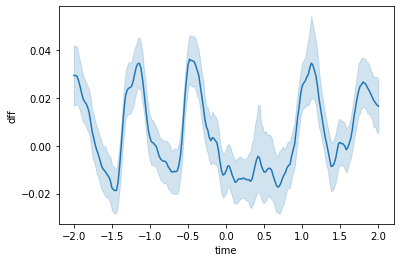

In [16]:
sns.lineplot(
    data = omission_triggered_response,
    x = 'time',
    y = 'dff'
)

## We can write a function to perform the above operation, which allows us to parallelize

In [17]:
def get_otr(cell_roi_id):
    session_id = cell_table.loc[cell_roi_id]['ophys_session_id']
    
    this_cell_response = mindscope_utilities.event_triggered_response(
        data = neural_data.loc[cell_roi_id].reset_index(),
        t = 'timestamps',
        y = 'dff',
        event_times = stimulus_data.query('ophys_session_id == @session_id and omitted')['start_time'],
        t_before = 2,
        t_after = 2,
        output_sampling_rate = 50
    )
    this_cell_response['cell_roi_id'] = cell_roi_id
    
    return this_cell_response

In [18]:
%%time
v=get_otr(cell_roi_id)

CPU times: user 162 ms, sys: 17.3 ms, total: 179 ms
Wall time: 176 ms


## Now apply the function to all cells in parallel

In [19]:
%%time
cell_roi_ids = cell_table.index.values

with Pool(32) as pool:
    otr_all = pd.concat(pool.map(get_otr, cell_roi_ids))

# We are going to group by timepoint and cell, giving us a single averaged response for each cell
otr_by_cell = otr_all.groupby(['time','cell_roi_id']).mean().reset_index()

CPU times: user 26.5 s, sys: 11.4 s, total: 37.9 s
Wall time: 42.7 s


In [20]:
otr_by_cell

,time,cell_roi_id,dff
0,-2.0,1080624718,0.017591
1,-2.0,1080624721,0.203460
2,-2.0,1080624724,0.018829
3,-2.0,1080624728,0.018093
4,-2.0,1080624729,0.045221
...,...,...,...
332047,2.0,1081961490,0.004919
332048,2.0,1081961491,0.202333
332049,2.0,1081961493,0.141012
332050,2.0,1081961494,0.092599


## Merge in experiment ID, then experiment metadata from the experiment table

In [21]:
otr_by_cell = otr_by_cell.merge(
    cell_table,
    left_on = 'cell_roi_id',
    right_index = True,
    how='left'
).merge(
    experiment_table,
    left_on = 'ophys_experiment_id',
    right_on = 'ophys_experiment_id'
)

In [22]:
otr_by_cell

,time,cell_roi_id,dff,cell_specimen_id,ophys_experiment_id,ophys_session_id_x,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id_y,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,file_id,image_set
0,-2.0,1080624718,0.017591,1086607523,1052637596,1052512524,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,528097,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,169.0,Vip-IRES-Cre,GCaMP6f,3.0,0,37.0,2,1052512524,1052547134,1052096570,VisualBehaviorMultiscope,225,VISl,2020-09-24 11:29:16.101372,OPHYS_3_images_A,1085397859,familiar
1,-2.0,1080624721,0.203460,1086606824,1052637596,1052512524,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,528097,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,169.0,Vip-IRES-Cre,GCaMP6f,3.0,0,37.0,2,1052512524,1052547134,1052096570,VisualBehaviorMultiscope,225,VISl,2020-09-24 11:29:16.101372,OPHYS_3_images_A,1085397859,familiar
2,-2.0,1080624724,0.018829,1086607591,1052637596,1052512524,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,528097,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,169.0,Vip-IRES-Cre,GCaMP6f,3.0,0,37.0,2,1052512524,1052547134,1052096570,VisualBehaviorMultiscope,225,VISl,2020-09-24 11:29:16.101372,OPHYS_3_images_A,1085397859,familiar
3,-2.0,1080624728,0.018093,1086607443,1052637596,1052512524,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,528097,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,169.0,Vip-IRES-Cre,GCaMP6f,3.0,0,37.0,2,1052512524,1052547134,1052096570,VisualBehaviorMultiscope,225,VISl,2020-09-24 11:29:16.101372,OPHYS_3_images_A,1085397859,familiar
4,-2.0,1080624729,0.045221,1086607139,1052637596,1052512524,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,528097,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,169.0,Vip-IRES-Cre,GCaMP6f,3.0,0,37.0,2,1052512524,1052547134,1052096570,VisualBehaviorMultiscope,225,VISl,2020-09-24 11:29:16.101372,OPHYS_3_images_A,1085397859,familiar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332047,2.0,1081961490,0.004919,1086619183,1050762974,1050597678,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523922,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,183.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,7,1050597678,1050620316,1046576791,VisualBehaviorMultiscope,217,VISl,2020-09-15 08:52:00.527831,OPHYS_4_images_B,1085394237,novel
332048,2.0,1081961491,0.202333,1086614984,1050762974,1050597678,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523922,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,183.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,7,1050597678,1050620316,1046576791,VisualBehaviorMultiscope,217,VISl,2020-09-15 08:52:00.527831,OPHYS_4_images_B,1085394237,novel
332049,2.0,1081961493,0.141012,1086614453,1050762974,1050597678,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523922,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,183.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,7,1050597678,1050620316,1046576791,VisualBehaviorMultiscope,217,VISl,2020-09-15 08:52:00.527831,OPHYS_4_images_B,1085394237,novel
332050,2.0,1081961494,0.092599,1086615331,1050762974,1050597678,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523922,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,183.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,7,1050597678,1050620316,1046576791,VisualBehaviorMultiscope,217,VISl,2020-09-15 08:52:00.527831,OPHYS_4_images_B,1085394237,novel


## Now plot the omission triggered response, averaging all cells within a given cre_line

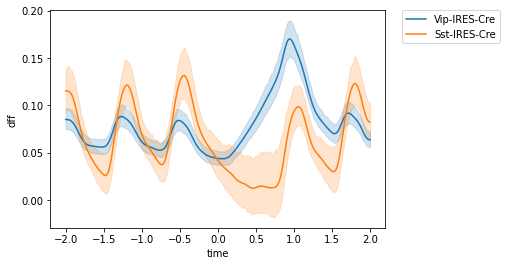

In [23]:
sns.lineplot(
    data = otr_by_cell,
    x = 'time',
    y = 'dff',
    n_boot = 1000,
    hue = 'cre_line',
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## And split further, using distinct linestyles for novel/familiar image sets
Now we can see that VIP cells show a dramatically different response profile in novel vs. familiar sessions, while Sst cells are much more consistent.

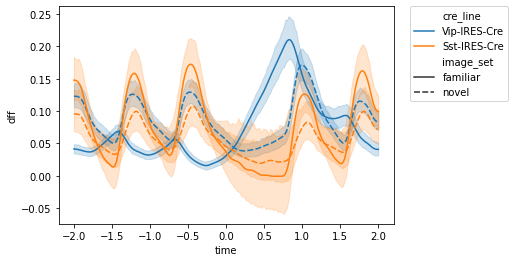

In [24]:
sns.lineplot(
    data = otr_by_cell,
    x = 'time',
    y = 'dff',
    n_boot = 1000,
    hue = 'cre_line',
    style = 'image_set'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)